In [89]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [10]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
df.shape

(7043, 21)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.drop(['customerID'],axis=1, inplace=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [17]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [21]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [23]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [25]:
df.iloc[488]['TotalCharges']

' '

In [26]:
df1 = df[df['TotalCharges']!=' ']

In [27]:
df1.shape

(7032, 20)

In [29]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/y6/0_966klx3ps3qwsqv5y381t40000gp/T/ipykernel_4195/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [30]:
df1.TotalCharges.dtype

dtype('float64')

In [32]:
import matplotlib.pyplot as plt

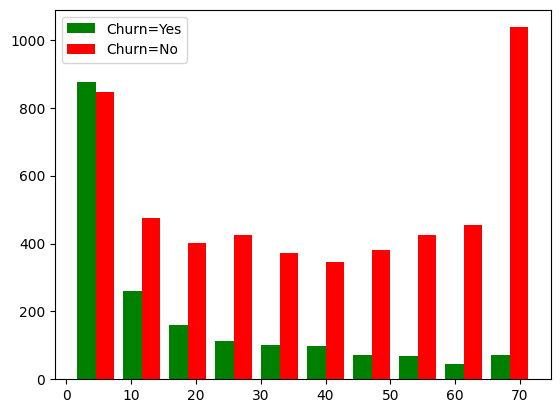

In [35]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()

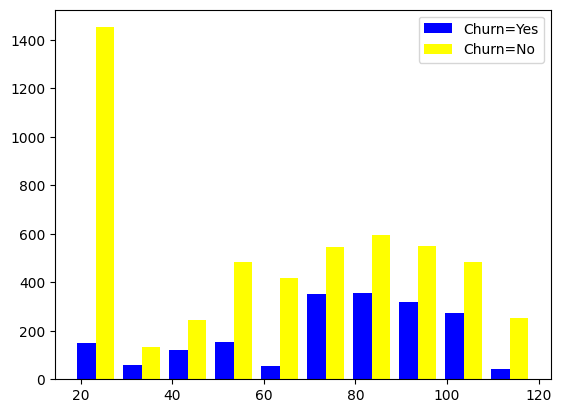

In [39]:
monthly_charge_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
monthly_charge_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([monthly_charge_churn_yes,monthly_charge_churn_no], color = ['blue', 'yellow'], label=['Churn=Yes','Churn=No'])
plt.legend()

In [42]:
for column in df:
    print(f'{column},{df[column].unique()}')

gender,['Female' 'Male']
SeniorCitizen,[0 1]
Partner,['Yes' 'No']
Dependents,['No' 'Yes']
tenure,[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService,['No' 'Yes']
MultipleLines,['No phone service' 'No' 'Yes']
InternetService,['DSL' 'Fiber optic' 'No']
OnlineSecurity,['No' 'Yes' 'No internet service']
OnlineBackup,['Yes' 'No' 'No internet service']
DeviceProtection,['No' 'Yes' 'No internet service']
TechSupport,['No' 'Yes' 'No internet service']
StreamingTV,['No' 'Yes' 'No internet service']
StreamingMovies,['No' 'Yes' 'No internet service']
Contract,['Month-to-month' 'One year' 'Two year']
PaperlessBilling,['Yes' 'No']
PaymentMethod,['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges,[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges,['29.85' '1889

In [53]:
def unique_value_for_object_column(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [54]:
unique_value_for_object_column(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [57]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace = True)

/var/folders/y6/0_966klx3ps3qwsqv5y381t40000gp/T/ipykernel_4195/1681747067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/y6/0_966klx3ps3qwsqv5y381t40000gp/T/ipykernel_4195/1681747067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [58]:
unique_value_for_object_column(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [59]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [60]:
len(yes_no_columns)

12

In [61]:
for cols in yes_no_columns:
    df1[cols].replace({'Yes':1,'No':0}, inplace=True)

/var/folders/y6/0_966klx3ps3qwsqv5y381t40000gp/T/ipykernel_4195/3002216113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols].replace({'Yes':1,'No':0}, inplace=True)


In [63]:
unique_value_for_object_column(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [64]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [66]:
df1['gender'].replace({'Male':0,'Female':1},inplace=True)

/var/folders/y6/0_966klx3ps3qwsqv5y381t40000gp/T/ipykernel_4195/4275986954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male':0,'Female':1},inplace=True)


In [69]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [74]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'], drop_first=True)
# Convert only the boolean columns to integers
df2 = df2.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [75]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3943,0,1,0,0,1,1,0,0,0,0,...,44.00,44.00,0,0,0,0,0,0,1,0
3140,0,0,0,0,14,1,0,0,0,1,...,76.45,1117.55,0,1,0,0,0,0,1,0
6244,0,1,1,0,54,1,1,0,0,1,...,99.05,5295.70,0,1,0,0,0,1,0,0


In [76]:
df2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
Contract_Two year   

In [79]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [81]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [82]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [84]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [86]:
X_train.shape

(4922, 23)

In [88]:
X_test.shape

(2110, 23)

In [95]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
154/154 [==============================] - 0s 736us/step - loss: 0.5644 - accuracy: 0.6985
Epoch 2/1000
154/154 [==============================] - 0s 710us/step - loss: 0.4394 - accuracy: 0.7873
Epoch 3/1000
154/154 [==============================] - 0s 737us/step - loss: 0.4214 - accuracy: 0.8041
Epoch 4/1000
154/154 [==============================] - 0s 723us/step - loss: 0.4164 - accuracy: 0.8066
Epoch 5/1000
154/154 [==============================] - 0s 722us/step - loss: 0.4133 - accuracy: 0.8082
Epoch 6/1000
154/154 [==============================] - 0s 702us/step - loss: 0.4111 - accuracy: 0.8104
Epoch 7/1000
154/154 [==============================] - 0s 731us/step - loss: 0.4107 - accuracy: 0.8080
Epoch 8/1000
154/154 [==============================] - 0s 894us/step - loss: 0.4086 - accuracy: 0.8072
Epoch 9/1000
154/154 [==============================] - 0s 783us/step - loss: 0.4081 - accuracy: 0.8082
Epoch 10/1000
154/154 [==============================] - 0s 852u

154/154 [==============================] - 0s 646us/step - loss: 0.3658 - accuracy: 0.8324
Epoch 80/1000
154/154 [==============================] - 0s 635us/step - loss: 0.3645 - accuracy: 0.8289
Epoch 81/1000
154/154 [==============================] - 0s 628us/step - loss: 0.3644 - accuracy: 0.8318
Epoch 82/1000
154/154 [==============================] - 0s 621us/step - loss: 0.3650 - accuracy: 0.8314
Epoch 83/1000
154/154 [==============================] - 0s 636us/step - loss: 0.3637 - accuracy: 0.8328
Epoch 84/1000
154/154 [==============================] - 0s 644us/step - loss: 0.3640 - accuracy: 0.8314
Epoch 85/1000
154/154 [==============================] - 0s 638us/step - loss: 0.3644 - accuracy: 0.8291
Epoch 86/1000
154/154 [==============================] - 0s 643us/step - loss: 0.3613 - accuracy: 0.8336
Epoch 87/1000
154/154 [==============================] - 0s 640us/step - loss: 0.3633 - accuracy: 0.8324
Epoch 88/1000
154/154 [==============================] - 0s 646us/ste

154/154 [==============================] - 0s 638us/step - loss: 0.3425 - accuracy: 0.8456
Epoch 157/1000
154/154 [==============================] - 0s 652us/step - loss: 0.3421 - accuracy: 0.8462
Epoch 158/1000
154/154 [==============================] - 0s 633us/step - loss: 0.3414 - accuracy: 0.8468
Epoch 159/1000
154/154 [==============================] - 0s 636us/step - loss: 0.3407 - accuracy: 0.8462
Epoch 160/1000
154/154 [==============================] - 0s 641us/step - loss: 0.3413 - accuracy: 0.8464
Epoch 161/1000
154/154 [==============================] - 0s 635us/step - loss: 0.3406 - accuracy: 0.8464
Epoch 162/1000
154/154 [==============================] - 0s 634us/step - loss: 0.3408 - accuracy: 0.8474
Epoch 163/1000
154/154 [==============================] - 0s 632us/step - loss: 0.3396 - accuracy: 0.8476
Epoch 164/1000
154/154 [==============================] - 0s 632us/step - loss: 0.3391 - accuracy: 0.8464
Epoch 165/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 644us/step - loss: 0.3263 - accuracy: 0.8576
Epoch 234/1000
154/154 [==============================] - 0s 639us/step - loss: 0.3278 - accuracy: 0.8535
Epoch 235/1000
154/154 [==============================] - 0s 645us/step - loss: 0.3276 - accuracy: 0.8545
Epoch 236/1000
154/154 [==============================] - 0s 639us/step - loss: 0.3270 - accuracy: 0.8551
Epoch 237/1000
154/154 [==============================] - 0s 634us/step - loss: 0.3265 - accuracy: 0.8535
Epoch 238/1000
154/154 [==============================] - 0s 640us/step - loss: 0.3288 - accuracy: 0.8521
Epoch 239/1000
154/154 [==============================] - 0s 631us/step - loss: 0.3286 - accuracy: 0.8527
Epoch 240/1000
154/154 [==============================] - 0s 632us/step - loss: 0.3277 - accuracy: 0.8519
Epoch 241/1000
154/154 [==============================] - 0s 637us/step - loss: 0.3260 - accuracy: 0.8539
Epoch 242/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 648us/step - loss: 0.3156 - accuracy: 0.8584
Epoch 311/1000
154/154 [==============================] - 0s 638us/step - loss: 0.3165 - accuracy: 0.8553
Epoch 312/1000
154/154 [==============================] - 0s 632us/step - loss: 0.3170 - accuracy: 0.8590
Epoch 313/1000
154/154 [==============================] - 0s 629us/step - loss: 0.3162 - accuracy: 0.8576
Epoch 314/1000
154/154 [==============================] - 0s 635us/step - loss: 0.3140 - accuracy: 0.8627
Epoch 315/1000
154/154 [==============================] - 0s 635us/step - loss: 0.3158 - accuracy: 0.8588
Epoch 316/1000
154/154 [==============================] - 0s 631us/step - loss: 0.3144 - accuracy: 0.8614
Epoch 317/1000
154/154 [==============================] - 0s 644us/step - loss: 0.3154 - accuracy: 0.8625
Epoch 318/1000
154/154 [==============================] - 0s 635us/step - loss: 0.3148 - accuracy: 0.8580
Epoch 319/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 661us/step - loss: 0.3093 - accuracy: 0.8614
Epoch 388/1000
154/154 [==============================] - 0s 632us/step - loss: 0.3091 - accuracy: 0.8618
Epoch 389/1000
154/154 [==============================] - 0s 674us/step - loss: 0.3082 - accuracy: 0.8625
Epoch 390/1000
154/154 [==============================] - 0s 638us/step - loss: 0.3095 - accuracy: 0.8659
Epoch 391/1000
154/154 [==============================] - 0s 728us/step - loss: 0.3095 - accuracy: 0.8616
Epoch 392/1000
154/154 [==============================] - 0s 748us/step - loss: 0.3086 - accuracy: 0.8618
Epoch 393/1000
154/154 [==============================] - 0s 678us/step - loss: 0.3082 - accuracy: 0.8627
Epoch 394/1000
154/154 [==============================] - 0s 660us/step - loss: 0.3080 - accuracy: 0.8614
Epoch 395/1000
154/154 [==============================] - 0s 658us/step - loss: 0.3071 - accuracy: 0.8606
Epoch 396/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 777us/step - loss: 0.3028 - accuracy: 0.8606
Epoch 465/1000
154/154 [==============================] - 0s 748us/step - loss: 0.3038 - accuracy: 0.8618
Epoch 466/1000
154/154 [==============================] - 0s 765us/step - loss: 0.3012 - accuracy: 0.8661
Epoch 467/1000
154/154 [==============================] - 0s 795us/step - loss: 0.3020 - accuracy: 0.8671
Epoch 468/1000
154/154 [==============================] - 0s 775us/step - loss: 0.3020 - accuracy: 0.8651
Epoch 469/1000
154/154 [==============================] - 0s 803us/step - loss: 0.3029 - accuracy: 0.8669
Epoch 470/1000
154/154 [==============================] - 0s 769us/step - loss: 0.3039 - accuracy: 0.8629
Epoch 471/1000
154/154 [==============================] - 0s 764us/step - loss: 0.3026 - accuracy: 0.8639
Epoch 472/1000
154/154 [==============================] - 0s 755us/step - loss: 0.3022 - accuracy: 0.8631
Epoch 473/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.8661
Epoch 542/1000
154/154 [==============================] - 0s 736us/step - loss: 0.2982 - accuracy: 0.8653
Epoch 543/1000
154/154 [==============================] - 0s 721us/step - loss: 0.2978 - accuracy: 0.8659
Epoch 544/1000
154/154 [==============================] - 0s 732us/step - loss: 0.2963 - accuracy: 0.8645
Epoch 545/1000
154/154 [==============================] - 0s 775us/step - loss: 0.2977 - accuracy: 0.8651
Epoch 546/1000
154/154 [==============================] - 0s 790us/step - loss: 0.2981 - accuracy: 0.8675
Epoch 547/1000
154/154 [==============================] - 0s 755us/step - loss: 0.2971 - accuracy: 0.8649
Epoch 548/1000
154/154 [==============================] - 0s 800us/step - loss: 0.2978 - accuracy: 0.8653
Epoch 549/1000
154/154 [==============================] - 0s 787us/step - loss: 0.2967 - accuracy: 0.8665
Epoch 550/1000
154/154 [==============================] - 0s 78

154/154 [==============================] - 0s 788us/step - loss: 0.2926 - accuracy: 0.8667
Epoch 619/1000
154/154 [==============================] - 0s 783us/step - loss: 0.2916 - accuracy: 0.8690
Epoch 620/1000
154/154 [==============================] - 0s 778us/step - loss: 0.2933 - accuracy: 0.8679
Epoch 621/1000
154/154 [==============================] - 0s 739us/step - loss: 0.2913 - accuracy: 0.8690
Epoch 622/1000
154/154 [==============================] - 0s 760us/step - loss: 0.2924 - accuracy: 0.8677
Epoch 623/1000
154/154 [==============================] - 0s 771us/step - loss: 0.2914 - accuracy: 0.8653
Epoch 624/1000
154/154 [==============================] - 0s 726us/step - loss: 0.2914 - accuracy: 0.8688
Epoch 625/1000
154/154 [==============================] - 0s 748us/step - loss: 0.2924 - accuracy: 0.8663
Epoch 626/1000
154/154 [==============================] - 0s 758us/step - loss: 0.2923 - accuracy: 0.8688
Epoch 627/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 828us/step - loss: 0.2886 - accuracy: 0.8718
Epoch 696/1000
154/154 [==============================] - 0s 815us/step - loss: 0.2864 - accuracy: 0.8718
Epoch 697/1000
154/154 [==============================] - 0s 766us/step - loss: 0.2887 - accuracy: 0.8728
Epoch 698/1000
154/154 [==============================] - 0s 764us/step - loss: 0.2868 - accuracy: 0.8710
Epoch 699/1000
154/154 [==============================] - 0s 776us/step - loss: 0.2859 - accuracy: 0.8730
Epoch 700/1000
154/154 [==============================] - 0s 786us/step - loss: 0.2868 - accuracy: 0.8748
Epoch 701/1000
154/154 [==============================] - 0s 786us/step - loss: 0.2871 - accuracy: 0.8708
Epoch 702/1000
154/154 [==============================] - 0s 764us/step - loss: 0.2877 - accuracy: 0.8714
Epoch 703/1000
154/154 [==============================] - 0s 786us/step - loss: 0.2869 - accuracy: 0.8744
Epoch 704/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 750us/step - loss: 0.2830 - accuracy: 0.8744
Epoch 773/1000
154/154 [==============================] - 0s 728us/step - loss: 0.2833 - accuracy: 0.8714
Epoch 774/1000
154/154 [==============================] - 0s 765us/step - loss: 0.2853 - accuracy: 0.8728
Epoch 775/1000
154/154 [==============================] - 0s 765us/step - loss: 0.2838 - accuracy: 0.8718
Epoch 776/1000
154/154 [==============================] - 0s 753us/step - loss: 0.2846 - accuracy: 0.8728
Epoch 777/1000
154/154 [==============================] - 0s 765us/step - loss: 0.2835 - accuracy: 0.8732
Epoch 778/1000
154/154 [==============================] - 0s 769us/step - loss: 0.2855 - accuracy: 0.8720
Epoch 779/1000
154/154 [==============================] - 0s 741us/step - loss: 0.2861 - accuracy: 0.8710
Epoch 780/1000
154/154 [==============================] - 0s 737us/step - loss: 0.2847 - accuracy: 0.8746
Epoch 781/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 778us/step - loss: 0.2805 - accuracy: 0.8720
Epoch 850/1000
154/154 [==============================] - 0s 752us/step - loss: 0.2808 - accuracy: 0.8759
Epoch 851/1000
154/154 [==============================] - 0s 780us/step - loss: 0.2788 - accuracy: 0.8753
Epoch 852/1000
154/154 [==============================] - 0s 755us/step - loss: 0.2801 - accuracy: 0.8726
Epoch 853/1000
154/154 [==============================] - 0s 731us/step - loss: 0.2806 - accuracy: 0.8712
Epoch 854/1000
154/154 [==============================] - 0s 723us/step - loss: 0.2832 - accuracy: 0.8724
Epoch 855/1000
154/154 [==============================] - 0s 773us/step - loss: 0.2807 - accuracy: 0.8748
Epoch 856/1000
154/154 [==============================] - 0s 749us/step - loss: 0.2801 - accuracy: 0.8740
Epoch 857/1000
154/154 [==============================] - 0s 745us/step - loss: 0.2824 - accuracy: 0.8753
Epoch 858/1000
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 714us/step - loss: 0.2803 - accuracy: 0.8726
Epoch 927/1000
154/154 [==============================] - 0s 712us/step - loss: 0.2770 - accuracy: 0.8759
Epoch 928/1000
154/154 [==============================] - 0s 729us/step - loss: 0.2782 - accuracy: 0.8720
Epoch 929/1000
154/154 [==============================] - 0s 719us/step - loss: 0.2779 - accuracy: 0.8771
Epoch 930/1000
154/154 [==============================] - 0s 702us/step - loss: 0.2774 - accuracy: 0.8742
Epoch 931/1000
154/154 [==============================] - 0s 717us/step - loss: 0.2789 - accuracy: 0.8728
Epoch 932/1000
154/154 [==============================] - 0s 742us/step - loss: 0.2778 - accuracy: 0.8771
Epoch 933/1000
154/154 [==============================] - 0s 752us/step - loss: 0.2792 - accuracy: 0.8740
Epoch 934/1000
154/154 [==============================] - 0s 761us/step - loss: 0.2796 - accuracy: 0.8746
Epoch 935/1000
154/154 [==============================] - 0s 

In [96]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 597us/step - loss: 0.7337 - accuracy: 0.7479


[0.7336599826812744, 0.7478672862052917]

In [99]:
yp = model.predict(X_test)
yp[:5]

66/66 [==============================] - 0s 490us/step


array([[6.1564554e-02],
       [4.0733451e-01],
       [4.1266212e-06],
       [7.3243618e-01],
       [4.1971329e-01]], dtype=float32)

In [101]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [102]:
y_pred = []
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [104]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1511
           1       0.57      0.45      0.50       599

    accuracy                           0.75      2110
   macro avg       0.68      0.66      0.67      2110
weighted avg       0.73      0.75      0.74      2110



Text(95.72222222222221, 0.5, 'Truth')

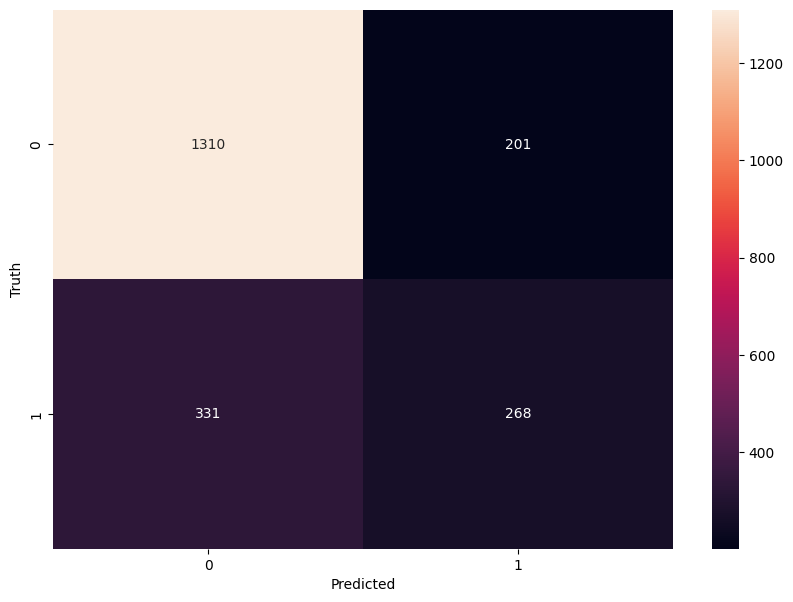

In [106]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [108]:
# Accuracy
(1310+268)/(1310+201+331+268)

0.747867298578199

In [112]:
# Precesion for class 0
round(1310/(1310+331),2)

0.8

In [113]:
# precesion for class 1
round(268/(268+201),2)

0.57

In [114]:
# Recall for 0th class
round(1310/(1310+201),2)


0.87

In [115]:
# Recall for 1th class
round(268/(268+331),2)

0.45

In [119]:
# f1-score for 0th class
(2*0.8*0.87)/(0.8+0.87)

0.8335329341317367

In [120]:
## f1-score for 1th class
(2*0.57*0.45)/(0.57+0.45)

0.5029411764705882